## DefiPy
- Uniswappy: https://github.com/defipy-devs/uniswappy
- Uniswap: https://github.com/uniswap-python/uniswap-python?tab=readme-ov-file
- https://github.com/defipy-devs/uniswappy/blob/main/notebooks/medium_articles/simple_simulation.ipynb

Geometric Brownian Motion (GBM): Continious time stochastic process in which the log of randomly varying quantity follows Brownian Motion w/drift
 - Used to model stock prices in Black-Scholes
 - Stochastic process ($S_{t}$) follows GBM if it satisifes the following SDE (Stochastic Differential Equation)
$$
dS_{t} = \mu S_{t} \, dt + \sigma S_{t} \, dW_{t}
$$ where $dW_{t}$ = Weiner Process / Brownian Motion, $\mu$ = The Percentage Drift, $\sigma$ = The Percentage Volatility
- The solution for $S_{t}$ which is also known as GBM is given by:
$$
S_{t} = S_{0} e^{\left( \mu - \frac{\sigma^2}{2} \right)t + \sigma W_{t}}
$$



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3
import datetime

from uniswappy.math.model import BrownianModel
from uniswappy.erc import ERC20
from uniswappy.cpt.factory import UniswapFactory
from uniswappy.process.deposit import SwapDeposit
from uniswappy.process.swap import Swap
from uniswappy.simulate import SolveDeltas
from uniswappy.simulate import SimpleLPSimulation

/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


ModuleNotFoundError: No module named 'pymc3'

In [1]:
# Generate Geometric Brownian Motion (GBM)

# Instantiation Parameters
n_steps = 5000     # Number of steps 
start_price = 0.1 # Initial price SYS/USD
mu = 0.3           # mu GBM process 
sigma = 0.5        # sigma GBM process
n_paths = 25      # Number of simulationed paths

# Brownian Model 
bm = BrownianModel(start_price)
p_arr = bm.gen_gbms(mu, sigma, n_steps, n_paths)

# Calc. price expectation
exp_p_arr = np.median(p_arr, axis = 1)

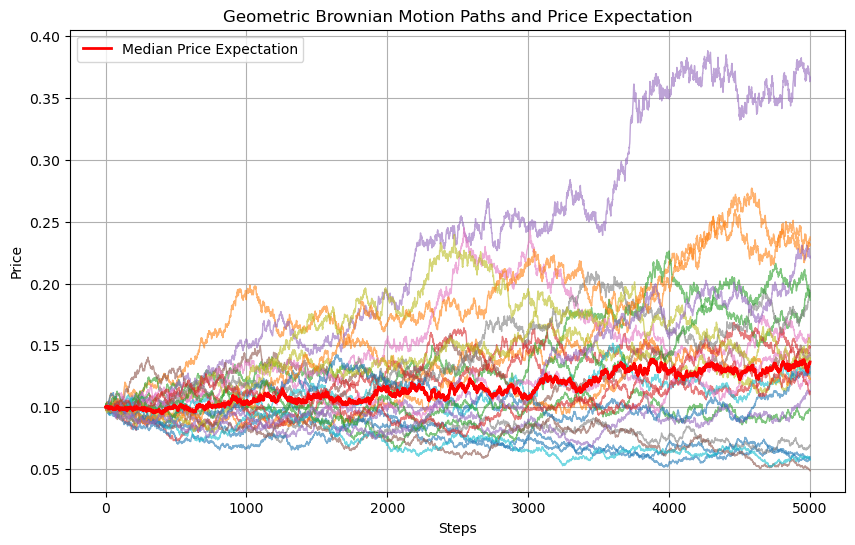

In [2]:
import matplotlib.pyplot as plt

# Plotting the GBM paths
plt.figure(figsize=(10, 6))
for i in range(p_arr.shape[1]):
    plt.plot(p_arr[:, i], lw=1, alpha=0.6)

# Plotting the price expectation
plt.plot(exp_p_arr, color='red', lw=2, label="Median Price Expectation")
plt.title("Geometric Brownian Motion Paths and Price Expectation")
plt.xlabel("Steps")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
from uniswappy.simulate import SimpleLPSimulation
from uniswappy.erc import ERC20

# Generate simulations
print(f'Trial run {k}')
p_trial_arr = p_arr[:,k]

tkn = ERC20('TKN', "0x09")
dai = ERC20('DAI', "0x111")
    
lp_sim = SimpleLPSimulation()
lp_sim.init_amts(10000, p_trial_arr[0])
lp_sim.create_lp(tkn, dai)
lp_sim.run(p_trial_arr)

NameError: name 'k' is not defined

In [3]:
from uniswappy import *

user_nm = 'user'
eth_amount = 1000
tkn_amount = 100000

tkn = ERC20("TKN", "0x111")
eth = ERC20("ETH", "0x09")
exchg_data = UniswapExchangeData(tkn0 = eth, tkn1 = tkn, symbol="LP", address="0x011")

factory = UniswapFactory("ETH pool factory", "0x2")
lp = factory.deploy(exchg_data)

Join().apply(lp, user_nm, eth_amount, tkn_amount)
lp.summary()

Exchange ETH-TKN (LP)
Reserves: ETH = 1000, TKN = 100000
Liquidity: 10000.0 

